# 1  CDIA20 | Projeto Final de Disciplina


Gabriel Crespi de Santana RA: 00274413

Kevin Egídio de Toledo RA: 00282590

Maria Eduarda Rocha Leal RA: 00274374

Pedro Lucas Silva Ferreira RA: 00285608

## 1º Semestre | Programação

## Questão Dirigida
Como o dólar variou em decorrência da pandemia de covid-19.

## Descrição do projeto


O objetivo do projeto é mostrar, através de gráficos dos cinco primeiros dias de cada mês, como a pandemia de Covid-19 influenciou na variação do dólar.

## Web Scraping

Primeiramente, vamos importar as bibliotecas necessárias para o projeto. Assim, poderemos começar a raspar os dados a partir de uma página web. O site escolhido foi o "Dólar Hoje".

In [1]:
import requests # Responsável por baixar a página web

from bs4 import BeautifulSoup # Responsável por raspar os dados

import pandas as pd # Responsável por tabular os dados obtidos

import re # Permite o uso de expressões regulares

import matplotlib.pyplot as plt # Responsável pelos gráficos de barras e dispersão



In [2]:
dolar = 'https://www.dolarhoje.net.br/dolar-comercial/'

page = requests.get(dolar) # Aqui, fazemos o download da página
page

<Response [200]>

O output <Response [200]> indica que o download foi bem sucedido

In [3]:
# Criamos um objeto BeautifulSoup para conseguir raspar os dados
soup = BeautifulSoup(page.content, 'html.parser')

soup.prettify() # Podemos usar o prettify() para exibir o conteúdo da página de maneira mais legível

'<!DOCTYPE html>\n<html lang="pt-br">\n <head>\n  <meta charset="utf-8"/>\n  <script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="" id="bsaihudashidsadhu" type="text/javascript">\n   window.ezogtk="";if(typeof processGoogleToken == "undefined") {processGoogleToken = function(a){window.ezogtk=a.newToken;processGoogleToken=null;var el = document.getElementById(\'bsaihudashidsadhu\');if(el != null){el.parentNode.removeChild(document.getElementById(\'bsaihudashidsadhu\'));document.head.removeChild(bsaihudashiudsadhu);}};\nvar bsaihudashiudsadhu = document.createElement(\'script\');\nbsaihudashiudsadhu.src =  \'https://adservice.google.com/adsid/integrator.js?domain=\'+window.location.hostname;\nbsaihudashiudsadhu.async = false;\ndocument.head.appendChild(bsaihudashiudsadhu);}\n  </script>\n  <script type="text/javascript">\n   var __banger_pmp_deals=function(){var d={18:{"DealId":18,"Floor":25},19:{"DealId":19,"Floor":100},17:{"DealId":17,"Floor":160},4:{"DealId":4,"F

In [4]:
tabela_geral = soup.find_all('div', class_='e')
tabela_geral # Separamos a tabela para começar a filtrar os dados

[<div class="e">
 </div>,
 <div class="e"><p class="silver"><strong>Janeiro</strong></p><p>02/01/2020 - R$ 4,023  </p><p>03/01/2020 - R$ 4,056 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.815%</p><p>06/01/2020 - R$ 4,062 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.148%</p><p>07/01/2020 - R$ 4,065 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.062%</p><p>08/01/2020 - R$ 4,052 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.312%</p><p>09/01/2020 - R$ 4,085 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.822%</p><p>10/01/2020 - R$ 4,092 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.176%</p><p>13/01/2020 - R$ 4,141 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.195%</p><p>14/01/2020 - R$ 4,130 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.28%</p><p>15/01/2020 - R$ 4,184 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.325%</p><p>16/01/2020 - R$ 4,193 <img src="//www.d

In [5]:
janeiro = tabela_geral[1] # Como os dados de cada mês estão em divs diferentes, cada mês recebe um índice de 'tabela_geral'
dias_jan = janeiro.find_all('p') # Encontramos as tags 'p', onde estão os textos desejados
dias_jan.pop(0) # Apagamos o primeiro item, que é somente o nome do respectivo mês e não uma informação útil
dias_jan.pop(0)
dias_jan # Repetimos esse processo para todos os meses


[<p>03/01/2020 - R$ 4,056 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.815%</p>,
 <p>06/01/2020 - R$ 4,062 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.148%</p>,
 <p>07/01/2020 - R$ 4,065 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.062%</p>,
 <p>08/01/2020 - R$ 4,052 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.312%</p>,
 <p>09/01/2020 - R$ 4,085 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.822%</p>,
 <p>10/01/2020 - R$ 4,092 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.176%</p>,
 <p>13/01/2020 - R$ 4,141 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.195%</p>,
 <p>14/01/2020 - R$ 4,130 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.28%</p>,
 <p>15/01/2020 - R$ 4,184 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.325%</p>,
 <p>16/01/2020 - R$ 4,193 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.201%</p>,
 <p>17/01/2020 - R$ 4,165 <img src="/

In [6]:
fevereiro = tabela_geral[2]
dias_fev = fevereiro.find_all('p')
dias_fev.pop(0)
dias_fev

[<p>03/02/2020 - R$ 4,249 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.838%</p>,
 <p>04/02/2020 - R$ 4,258 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.209%</p>,
 <p>05/02/2020 - R$ 4,239 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.446%</p>,
 <p>06/02/2020 - R$ 4,285 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.078%</p>,
 <p>07/02/2020 - R$ 4,320 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.819%</p>,
 <p>10/02/2020 - R$ 4,322 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.06%</p>,
 <p>11/02/2020 - R$ 4,327 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.104%</p>,
 <p>12/02/2020 - R$ 4,351 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.545%</p>,
 <p>13/02/2020 - R$ 4,334 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.382%</p>,
 <p>14/02/2020 - R$ 4,300 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.789%</p>,
 <p>17/02/2020 - R$ 4,329 <img sr

In [7]:
marco = tabela_geral[3]
dias_mar = marco.find_all('p')
dias_mar.pop(0)
dias_mar

[<p>02/03/2020 - R$ 4,481 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.007%</p>,
 <p>03/03/2020 - R$ 4,479 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.047%</p>,
 <p>09/03/2020 - R$ 4,742 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 5.893%</p>,
 <p>10/03/2020 - R$ 4,645 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -2.06%</p>,
 <p>11/03/2020 - R$ 4,722 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.653%</p>,
 <p>12/03/2020 - R$ 4,788 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.413%</p>,
 <p>13/03/2020 - R$ 4,813 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.512%</p>,
 <p>16/03/2020 - R$ 5,061 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 4.848%</p>,
 <p>17/03/2020 - R$ 5,006 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -1.099%</p>,
 <p>18/03/2020 - R$ 5,196 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 3.794%</p>,
 <p>19/03/2020 - R$ 5,098 <img sr

In [8]:
abril = tabela_geral[4]
dias_abr = abril.find_all('p')
dias_abr.pop(0)
dias_abr

[<p>01/04/2020 - R$ 5,262 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.278%</p>,
 <p>02/04/2020 - R$ 5,265 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.053%</p>,
 <p>03/04/2020 - R$ 5,327 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.181%</p>,
 <p>06/04/2020 - R$ 5,294 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.627%</p>,
 <p>07/04/2020 - R$ 5,225 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -1.301%</p>,
 <p>08/04/2020 - R$ 5,141 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -1.604%</p>,
 <p>09/04/2020 - R$ 5,093 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.947%</p>,
 <p>10/04/2020 - R$ 5,093 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> 0%</p>,
 <p>13/04/2020 - R$ 5,180 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.72%</p>,
 <p>14/04/2020 - R$ 5,189 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.162%</p>,
 <p>15/04/2020 - R$ 5,242 <img src="

In [9]:
maio = tabela_geral[5]
dias_mai = maio.find_all('p')
dias_mai.pop(0)
dias_mai



[<p>01/05/2020 - R$ 5,440 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0%</p>,
 <p>04/05/2020 - R$ 5,521 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.491%</p>,
 <p>05/05/2020 - R$ 5,593 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.313%</p>,
 <p>06/05/2020 - R$ 5,703 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.961%</p>,
 <p>07/05/2020 - R$ 5,846 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 2.506%</p>,
 <p>08/05/2020 - R$ 5,743 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -1.764%</p>,
 <p>11/05/2020 - R$ 5,819 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 1.33%</p>,
 <p>12/05/2020 - R$ 5,869 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.858%</p>,
 <p>13/05/2020 - R$ 5,901 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.538%</p>,
 <p>14/05/2020 - R$ 5,819 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -1.391%</p>,
 <p>15/05/2020 - R$ 5,838 <img src="//www

In [10]:
junho = tabela_geral[6]
dias_jun = junho.find_all('p')
dias_jun.pop(0)
dias_jun.pop(-1) # Aqui, retiramos as duas últimas linhas do mês, pois são textos desnecessários ao projeto
dias_jun.pop(-1)
dias_jun

[<p>01/06/2020 - R$ 5,387 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.944%</p>,
 <p>02/06/2020 - R$ 5,212 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -3.252%</p>,
 <p>03/06/2020 - R$ 5,093 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -2.285%</p>,
 <p>04/06/2020 - R$ 5,130 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.73%</p>,
 <p>05/06/2020 - R$ 4,993 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -2.665%</p>,
 <p>08/06/2020 - R$ 4,854 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -2.786%</p>,
 <p>09/06/2020 - R$ 4,888 <img src="//www.dolarhoje.net.br/imagens/seta-sobe.png"/> 0.707%</p>,
 <p>10/06/2020 - R$ 4,862 <img src="//www.dolarhoje.net.br/imagens/seta-desce.png"/> -0.544%</p>]

## Criando um arquivo .csv

Agora, vamos utilizar expressões regulares dentro de uma função para preparar as linhas do futuro arquivo .csv

In [11]:
def prep_linha(linha):
    linha = linha.replace(',', '.') # Troca a vírgula pelo ponto, como separador decimal
    
    linha = linha.replace(' ', '\t') # Substitui os espaços em branco na string por uma tabulação
    
    linha = re.sub('\t-\t', '\t', linha) # Substitui o padrão '\t-\t' por um '\t' apenas
    
    linha = linha.replace('R$', '') # Remove o símbolo que representa a moeda brasileira
    
    linha = linha.replace('%', '') # Remove o símbolo de porcentagem da string
    
    linha = linha.replace('\t\t', '\t')
       
    return linha

O próximo passo é juntar todas as linhas em um único arquivo de texto, contendo todos os dados de todos os meses, separados por tabulação

In [12]:
texto_final = 'Data:\tPreço:\tVariação(em %):\n'

for i in range(0, len(dias_jan)):
    linha = prep_linha(dias_jan[i].get_text())
    texto_final += linha
    texto_final += '\n'
    
for i in range(0, len(dias_fev)):
    linha = prep_linha(dias_fev[i].get_text())
    texto_final += linha
    texto_final += '\n'
    
for i in range(0, len(dias_mar)):
    linha = prep_linha(dias_mar[i].get_text())
    texto_final += linha
    texto_final += '\n'
    
for i in range(0, len(dias_abr)):
    linha = prep_linha(dias_abr[i].get_text())
    texto_final += linha
    texto_final += '\n'
    
for i in range(0, len(dias_mai)):
    linha = prep_linha(dias_mai[i].get_text())
    texto_final += linha
    texto_final += '\n'
    
for i in range(0, len(dias_jun)):
    linha = prep_linha(dias_jun[i].get_text())
    texto_final += linha
    texto_final += '\n'

print(texto_final)

Data:	Preço:	Variação(em %):
03/01/2020	4.056	0.815
06/01/2020	4.062	0.148
07/01/2020	4.065	0.062
08/01/2020	4.052	-0.312
09/01/2020	4.085	0.822
10/01/2020	4.092	0.176
13/01/2020	4.141	1.195
14/01/2020	4.130	-0.28
15/01/2020	4.184	1.325
16/01/2020	4.193	0.201
17/01/2020	4.165	-0.658
20/01/2020	4.189	0.564
21/01/2020	4.205	0.392
22/01/2020	4.175	-0.706
23/01/2020	4.166	-0.225
24/01/2020	4.184	0.432
27/01/2020	4.209	0.605
28/01/2020	4.193	-0.38
29/01/2020	4.219	0.622
30/01/2020	4.257	0.903
31/01/2020	4.285	0.648
03/02/2020	4.249	-0.838
04/02/2020	4.258	0.209
05/02/2020	4.239	-0.446
06/02/2020	4.285	1.078
07/02/2020	4.320	0.819
10/02/2020	4.322	0.06
11/02/2020	4.327	0.104
12/02/2020	4.351	0.545
13/02/2020	4.334	-0.382
14/02/2020	4.300	-0.789
17/02/2020	4.329	0.681
18/02/2020	4.357	0.642
19/02/2020	4.365	0.188
20/02/2020	4.392	0.612
21/02/2020	4.393	0.02
24/02/2020	4.393	0
25/02/2020	4.393	0
26/02/2020	4.441	1.095
27/02/2020	4.476	0.804
28/02/2020	4.481	0.101
02/03/2020	4.481	-0.007
03/03/

Para poder manipular os dados, precisamos criar um arquivo .csv:

In [13]:
arquivo = open('variacao-dolar.csv', 'w') # Cria um arquivo .csv no mesmo diretório deste caderno
arquivo.write(texto_final)
arquivo.close()
arquivo

<_io.TextIOWrapper name='variacao-dolar.csv' mode='w' encoding='cp1252'>

## Tabulação dos dados com Pandas

Agora, precisamos ler os dados do arquivo .csv para poder criar os gráficos necessários para a análise

In [14]:
df = pd.read_csv('variacao-dolar.csv', sep='\t', encoding='latin-1') # Lemos o arquivo csv com o framework Pandas
df

,Data:,Preço:,Variação(em %):
0,03/01/2020,4.056,0.815
1,06/01/2020,4.062,0.148
2,07/01/2020,4.065,0.062
3,08/01/2020,4.052,-0.312
4,09/01/2020,4.085,0.822
...,...,...,...
106,04/06/2020,5.130,0.730
107,05/06/2020,4.993,-2.665
108,08/06/2020,4.854,-2.786
109,09/06/2020,4.888,0.707


In [15]:
df["Preço:"] # Podemos ver somente a coluna que contém o preço do dólar em reais

0      4.056
1      4.062
2      4.065
3      4.052
4      4.085
       ...  
106    5.130
107    4.993
108    4.854
109    4.888
110    4.862
Name: Preço:, Length: 111, dtype: float64

Agora, criamos o gráfico dos meses de janeiro a junho

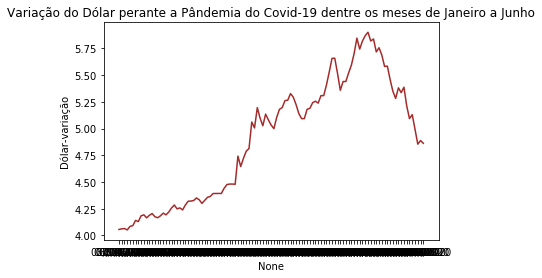

In [16]:
x = df["Data:"] # O eixo x receberá as datas
y = df["Preço:"] # O eixo y receberá as variações do dólar

plt.plot(x,y, "brown") # O método .plot() gera o gráfico com os eixos, nesse caso com a linha colorida em marrom
plt.title("Variação do Dólar perante a Pândemia do Covid-19 dentre os meses de Janeiro a Junho") # Título do Gráfico

plt.xlabel("None") # Nome do eixo x

plt.ylabel("Dólar-variação") # Nome do eixo y

plt.show() # Exibe o gráfico

Agora que nós conseguimos montar a tabela iremos separar por mês, para que possamos criar os gráficos, nos quais iremos mostrar a variação do Dólar nos primeiros 6 dias de cada mês. Para facilitar o processo, vamos criar um arquivo .csv para cada mês

## ***Janeiro***

In [17]:
# Primeira linha do arquivo de texto, separada por tabulação e pulando para a próxima linha no final
texto_final_Janeiro = 'Data:\tPreço:\tVariação(em %):\n' 

for i in range(0, len(dias_jan)): # Usamos o laço de repetição for para adicionar cada variação em uma linha diferente
    linha = prep_linha(dias_jan[i].get_text())
    texto_final_Janeiro += linha
    texto_final_Janeiro += '\n'

print(texto_final_Janeiro)

Data:	Preço:	Variação(em %):
03/01/2020	4.056	0.815
06/01/2020	4.062	0.148
07/01/2020	4.065	0.062
08/01/2020	4.052	-0.312
09/01/2020	4.085	0.822
10/01/2020	4.092	0.176
13/01/2020	4.141	1.195
14/01/2020	4.130	-0.28
15/01/2020	4.184	1.325
16/01/2020	4.193	0.201
17/01/2020	4.165	-0.658
20/01/2020	4.189	0.564
21/01/2020	4.205	0.392
22/01/2020	4.175	-0.706
23/01/2020	4.166	-0.225
24/01/2020	4.184	0.432
27/01/2020	4.209	0.605
28/01/2020	4.193	-0.38
29/01/2020	4.219	0.622
30/01/2020	4.257	0.903
31/01/2020	4.285	0.648



In [18]:
arquivo_Janeiro = open('variacao-dolar-Janeiro.csv', 'w') # Criamos um csv contendo o arquivo de texto gerado
arquivo_Janeiro.write(texto_final_Janeiro)
arquivo_Janeiro.close()
arquivo_Janeiro 

<_io.TextIOWrapper name='variacao-dolar-Janeiro.csv' mode='w' encoding='cp1252'>

In [19]:
df_Janeiro = pd.read_csv('variacao-dolar-Janeiro.csv', sep='\t', encoding='latin-1') # Lemos o arquivo de janeiro com o Pandas
df_Janeiro

,Data:,Preço:,Variação(em %):
0,03/01/2020,4.056,0.815
1,06/01/2020,4.062,0.148
2,07/01/2020,4.065,0.062
3,08/01/2020,4.052,-0.312
4,09/01/2020,4.085,0.822
5,10/01/2020,4.092,0.176
6,13/01/2020,4.141,1.195
7,14/01/2020,4.130,-0.280
8,15/01/2020,4.184,1.325
9,16/01/2020,4.193,0.201


In [20]:
Seis_dias_de_Janeiro = df_Janeiro.head(6) # Atribuímos à uma variável específica somente os seis primeiros dias de janeiro
Seis_dias_de_Janeiro

,Data:,Preço:,Variação(em %):
0,03/01/2020,4.056,0.815
1,06/01/2020,4.062,0.148
2,07/01/2020,4.065,0.062
3,08/01/2020,4.052,-0.312
4,09/01/2020,4.085,0.822
5,10/01/2020,4.092,0.176


In [21]:
Seis_dias_de_Janeiro['Data:']

0    03/01/2020
1    06/01/2020
2    07/01/2020
3    08/01/2020
4    09/01/2020
5    10/01/2020
Name: Data:, dtype: object

In [22]:
Seis_dias_de_Janeiro['Preço:']

0    4.056
1    4.062
2    4.065
3    4.052
4    4.085
5    4.092
Name: Preço:, dtype: float64

# ***Fevereiro***

In [23]:
texto_final_Fevereiro = 'Data:\tPreço:\tVariação(em %):\n'

for i in range(0, len(dias_fev)):
    linha = prep_linha(dias_fev[i].get_text())
    texto_final_Fevereiro += linha
    texto_final_Fevereiro += '\n'
print(texto_final_Fevereiro)   

Data:	Preço:	Variação(em %):
03/02/2020	4.249	-0.838
04/02/2020	4.258	0.209
05/02/2020	4.239	-0.446
06/02/2020	4.285	1.078
07/02/2020	4.320	0.819
10/02/2020	4.322	0.06
11/02/2020	4.327	0.104
12/02/2020	4.351	0.545
13/02/2020	4.334	-0.382
14/02/2020	4.300	-0.789
17/02/2020	4.329	0.681
18/02/2020	4.357	0.642
19/02/2020	4.365	0.188
20/02/2020	4.392	0.612
21/02/2020	4.393	0.02
24/02/2020	4.393	0
25/02/2020	4.393	0
26/02/2020	4.441	1.095
27/02/2020	4.476	0.804
28/02/2020	4.481	0.101



In [24]:
arquivo_Fevereiro = open('variacao-dolar-Fevereiro.csv', 'w')
arquivo_Fevereiro.write(texto_final_Fevereiro)
arquivo_Fevereiro.close()
arquivo_Fevereiro

<_io.TextIOWrapper name='variacao-dolar-Fevereiro.csv' mode='w' encoding='cp1252'>

In [25]:
df_Fevereiro = pd.read_csv('variacao-dolar-Fevereiro.csv', sep='\t', encoding='latin-1')
df_Fevereiro

,Data:,Preço:,Variação(em %):
0,03/02/2020,4.249,-0.838
1,04/02/2020,4.258,0.209
2,05/02/2020,4.239,-0.446
3,06/02/2020,4.285,1.078
4,07/02/2020,4.320,0.819
5,10/02/2020,4.322,0.060
6,11/02/2020,4.327,0.104
7,12/02/2020,4.351,0.545
8,13/02/2020,4.334,-0.382
9,14/02/2020,4.300,-0.789


In [26]:
Seis_dias_de_Fevereiro = df_Fevereiro.head(6)
Seis_dias_de_Fevereiro

,Data:,Preço:,Variação(em %):
0,03/02/2020,4.249,-0.838
1,04/02/2020,4.258,0.209
2,05/02/2020,4.239,-0.446
3,06/02/2020,4.285,1.078
4,07/02/2020,4.320,0.819
5,10/02/2020,4.322,0.060


In [27]:
Seis_dias_de_Fevereiro['Data:']

0    03/02/2020
1    04/02/2020
2    05/02/2020
3    06/02/2020
4    07/02/2020
5    10/02/2020
Name: Data:, dtype: object

In [28]:
Seis_dias_de_Fevereiro['Preço:']

0    4.249
1    4.258
2    4.239
3    4.285
4    4.320
5    4.322
Name: Preço:, dtype: float64

# ***Março***

In [29]:
texto_final_Março = 'Data:\tPreço:\tVariação(em %):\n'

for i in range(0, len(dias_mar)):
    linha = prep_linha(dias_mar[i].get_text())
    texto_final_Março += linha
    texto_final_Março += '\n'

print(texto_final_Março)

Data:	Preço:	Variação(em %):
02/03/2020	4.481	-0.007
03/03/2020	4.479	-0.047
09/03/2020	4.742	5.893
10/03/2020	4.645	-2.06
11/03/2020	4.722	1.653
12/03/2020	4.788	1.413
13/03/2020	4.813	0.512
16/03/2020	5.061	4.848
17/03/2020	5.006	-1.099
18/03/2020	5.196	3.794
19/03/2020	5.098	-1.88
20/03/2020	5.026	-1.408
23/03/2020	5.135	1.436
24/03/2020	5.081	-1.048
25/03/2020	5.033	-0.958
26/03/2020	4.999	-0.674
27/03/2020	5.104	2.101
30/03/2020	5.180	1.497
31/03/2020	5.196	0.305



In [30]:
arquivo_Março = open('variacao-dolar-Março.csv', 'w')
arquivo_Março.write(texto_final_Março)
arquivo_Março.close()
arquivo_Março

<_io.TextIOWrapper name='variacao-dolar-Março.csv' mode='w' encoding='cp1252'>

In [31]:
df_Março = pd.read_csv('variacao-dolar-Março.csv', sep='\t', encoding='latin-1')
df_Março

,Data:,Preço:,Variação(em %):
0,02/03/2020,4.481,-0.007
1,03/03/2020,4.479,-0.047
2,09/03/2020,4.742,5.893
3,10/03/2020,4.645,-2.060
4,11/03/2020,4.722,1.653
5,12/03/2020,4.788,1.413
6,13/03/2020,4.813,0.512
7,16/03/2020,5.061,4.848
8,17/03/2020,5.006,-1.099
9,18/03/2020,5.196,3.794


In [32]:
Seis_dias_de_Março = df_Março.head(6)
Seis_dias_de_Março

,Data:,Preço:,Variação(em %):
0,02/03/2020,4.481,-0.007
1,03/03/2020,4.479,-0.047
2,09/03/2020,4.742,5.893
3,10/03/2020,4.645,-2.060
4,11/03/2020,4.722,1.653
5,12/03/2020,4.788,1.413


In [33]:
Seis_dias_de_Março['Data:']

0    02/03/2020
1    03/03/2020
2    09/03/2020
3    10/03/2020
4    11/03/2020
5    12/03/2020
Name: Data:, dtype: object

In [34]:
Seis_dias_de_Março['Preço:']

0    4.481
1    4.479
2    4.742
3    4.645
4    4.722
5    4.788
Name: Preço:, dtype: float64

# ***Abril***

In [35]:
texto_final_Abril = 'Data:\tPreço:\tVariação(em %):\n'   
    
for i in range(0, len(dias_abr)):
    linha = prep_linha(dias_abr[i].get_text())
    texto_final_Abril += linha
    texto_final_Abril += '\n'
    
print(texto_final_Abril)
    

Data:	Preço:	Variação(em %):
01/04/2020	5.262	1.278
02/04/2020	5.265	0.053
03/04/2020	5.327	1.181
06/04/2020	5.294	-0.627
07/04/2020	5.225	-1.301
08/04/2020	5.141	-1.604
09/04/2020	5.093	-0.947
10/04/2020	5.093	0
13/04/2020	5.180	1.72
14/04/2020	5.189	0.162
15/04/2020	5.242	1.029
16/04/2020	5.256	0.269
17/04/2020	5.238	-0.339
20/04/2020	5.308	1.327
21/04/2020	5.308	0
22/04/2020	5.409	1.91
23/04/2020	5.529	2.206
24/04/2020	5.657	2.33
27/04/2020	5.658	0.014
28/04/2020	5.515	-2.529
29/04/2020	5.358	-2.843
30/04/2020	5.440	1.521



In [36]:
arquivo_Abril = open('variacao-dolar-Abril.csv', 'w')
arquivo_Abril.write(texto_final_Abril)
arquivo_Abril.close()
arquivo_Abril 

<_io.TextIOWrapper name='variacao-dolar-Abril.csv' mode='w' encoding='cp1252'>

In [37]:
df_Abril = pd.read_csv('variacao-dolar-Abril.csv', sep='\t', encoding='latin-1')
df_Abril

,Data:,Preço:,Variação(em %):
0,01/04/2020,5.262,1.278
1,02/04/2020,5.265,0.053
2,03/04/2020,5.327,1.181
3,06/04/2020,5.294,-0.627
4,07/04/2020,5.225,-1.301
5,08/04/2020,5.141,-1.604
6,09/04/2020,5.093,-0.947
7,10/04/2020,5.093,0.000
8,13/04/2020,5.180,1.720
9,14/04/2020,5.189,0.162


In [38]:
Seis_dias_de_Abril = df_Abril.head(6)
Seis_dias_de_Abril

,Data:,Preço:,Variação(em %):
0,01/04/2020,5.262,1.278
1,02/04/2020,5.265,0.053
2,03/04/2020,5.327,1.181
3,06/04/2020,5.294,-0.627
4,07/04/2020,5.225,-1.301
5,08/04/2020,5.141,-1.604


In [39]:
Seis_dias_de_Abril['Data:']

0    01/04/2020
1    02/04/2020
2    03/04/2020
3    06/04/2020
4    07/04/2020
5    08/04/2020
Name: Data:, dtype: object

In [40]:
Seis_dias_de_Abril['Preço:']

0    5.262
1    5.265
2    5.327
3    5.294
4    5.225
5    5.141
Name: Preço:, dtype: float64

#  ***Maio***

In [41]:
texto_final_Maio = 'Data:\tPreço:\tVariação(em %):\n'

for i in range(0, len(dias_mai)):
    linha = prep_linha(dias_mai[i].get_text())
    texto_final_Maio += linha
    texto_final_Maio += '\n'

print(texto_final_Maio)

Data:	Preço:	Variação(em %):
01/05/2020	5.440	0
04/05/2020	5.521	1.491
05/05/2020	5.593	1.313
06/05/2020	5.703	1.961
07/05/2020	5.846	2.506
08/05/2020	5.743	-1.764
11/05/2020	5.819	1.33
12/05/2020	5.869	0.858
13/05/2020	5.901	0.538
14/05/2020	5.819	-1.391
15/05/2020	5.838	0.34
18/05/2020	5.717	-2.086
19/05/2020	5.756	0.694
20/05/2020	5.688	-1.195
21/05/2020	5.581	-1.871
22/05/2020	5.584	0.056
25/05/2020	5.459	-2.247
26/05/2020	5.349	-2.004
27/05/2020	5.282	-1.253
28/05/2020	5.381	1.872
29/05/2020	5.336	-0.833



In [42]:
arquivo_Maio = open('variacao-dolar-Maio.csv', 'w')
arquivo_Maio.write(texto_final_Maio)
arquivo_Maio.close()
arquivo_Maio 

<_io.TextIOWrapper name='variacao-dolar-Maio.csv' mode='w' encoding='cp1252'>

In [43]:
df_Maio = pd.read_csv('variacao-dolar-Maio.csv', sep='\t', encoding='latin-1')
df_Maio

,Data:,Preço:,Variação(em %):
0,01/05/2020,5.440,0.000
1,04/05/2020,5.521,1.491
2,05/05/2020,5.593,1.313
3,06/05/2020,5.703,1.961
4,07/05/2020,5.846,2.506
5,08/05/2020,5.743,-1.764
6,11/05/2020,5.819,1.330
7,12/05/2020,5.869,0.858
8,13/05/2020,5.901,0.538
9,14/05/2020,5.819,-1.391


In [44]:
Seis_dias_de_Maio = df_Maio.head(6)
Seis_dias_de_Maio

,Data:,Preço:,Variação(em %):
0,01/05/2020,5.440,0.000
1,04/05/2020,5.521,1.491
2,05/05/2020,5.593,1.313
3,06/05/2020,5.703,1.961
4,07/05/2020,5.846,2.506
5,08/05/2020,5.743,-1.764


In [45]:
Seis_dias_de_Maio['Data:']

0    01/05/2020
1    04/05/2020
2    05/05/2020
3    06/05/2020
4    07/05/2020
5    08/05/2020
Name: Data:, dtype: object

In [46]:
Seis_dias_de_Maio['Preço:']

0    5.440
1    5.521
2    5.593
3    5.703
4    5.846
5    5.743
Name: Preço:, dtype: float64

# ***Junho***

In [47]:
texto_final_Junho = 'Data:\tPreço:\tVariação(em %):\n'

for i in range(0, len(dias_jun)):
    linha = prep_linha(dias_jun[i].get_text())
    texto_final_Junho += linha
    texto_final_Junho += '\n'
print(texto_final_Junho)
    

Data:	Preço:	Variação(em %):
01/06/2020	5.387	0.944
02/06/2020	5.212	-3.252
03/06/2020	5.093	-2.285
04/06/2020	5.130	0.73
05/06/2020	4.993	-2.665
08/06/2020	4.854	-2.786
09/06/2020	4.888	0.707
10/06/2020	4.862	-0.544



In [48]:
arquivo_Junho = open('variacao-dolar-Junho.csv', 'w')
arquivo_Junho.write(texto_final_Junho)
arquivo_Junho.close()
arquivo_Junho

<_io.TextIOWrapper name='variacao-dolar-Junho.csv' mode='w' encoding='cp1252'>

In [49]:
df_Junho = pd.read_csv('variacao-dolar-Junho.csv', sep='\t', encoding='latin-1')
df_Junho 

,Data:,Preço:,Variação(em %):
0,01/06/2020,5.387,0.944
1,02/06/2020,5.212,-3.252
2,03/06/2020,5.093,-2.285
3,04/06/2020,5.130,0.730
4,05/06/2020,4.993,-2.665
5,08/06/2020,4.854,-2.786
6,09/06/2020,4.888,0.707
7,10/06/2020,4.862,-0.544


In [50]:
Seis_dias_de_Junho = df_Junho.head(6)
Seis_dias_de_Junho 


,Data:,Preço:,Variação(em %):
0,01/06/2020,5.387,0.944
1,02/06/2020,5.212,-3.252
2,03/06/2020,5.093,-2.285
3,04/06/2020,5.130,0.730
4,05/06/2020,4.993,-2.665
5,08/06/2020,4.854,-2.786


In [51]:
Seis_dias_de_Junho["Data:"]

0    01/06/2020
1    02/06/2020
2    03/06/2020
3    04/06/2020
4    05/06/2020
5    08/06/2020
Name: Data:, dtype: object

In [52]:
Seis_dias_de_Junho["Preço:"]

0    5.387
1    5.212
2    5.093
3    5.130
4    4.993
5    4.854
Name: Preço:, dtype: float64

## Criando gráficos com Pyplot
Agora iremos colocar os gráficos, um do lado do outro para que possa ter uma comparação

## **Janeiro**

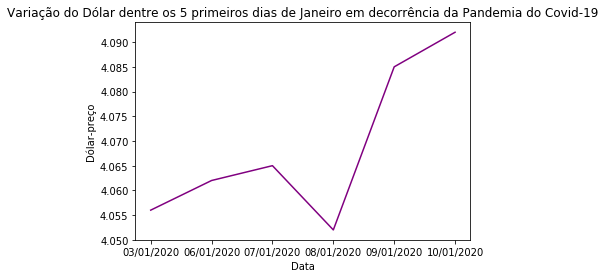

In [53]:
# Da mesma forma que foi feito o gráfico geral, faremos para todos os meses até junho, gerando um gráfico para cada mês

x = Seis_dias_de_Janeiro['Data:'] # Dados do eixo x (Datas)
y = Seis_dias_de_Janeiro['Preço:'] # Dados do eixo y (Preços)

plt.plot(x,y, "purple") # Gera o gráfico, com os eixos criados e colorindo a linha com uma cor desejada


plt.title("Variação do Dólar dentre os 5 primeiros dias de Janeiro em decorrência da Pandemia do Covid-19") # Título do Gráfico


plt.ylabel("Dólar-preço") # Nome do eixo y

plt.xlabel("Data") # Nome do eixo x

plt.show() # Exibe o gráfico

# ***Noticias que influenciaram o Dólar no mês de Janeiro:***

1. Em janeiro, o Dólar subiu 6,86%. Foi a maior alta para qualquer mês desde agosto de 2019 (8,51%) e a mais intensa para meses de janeiro desde 2010 (8,86%), de acordo com a Reuters (agência de notícias britânica).

2. Isso se ocorreu devido a preocupação dos investidores com o novo surto que surgiu na segunda maior economias do mundo, o coronavírus. O receio do mercado e que esse novo vírus afete negativamente na demanda dos consumidores e tenha impactos mais diretos sobre a atividade econômica, relembrando a epidemia de 2002, a SARS, que também ocorreu na China.

# ***Fevereiro***

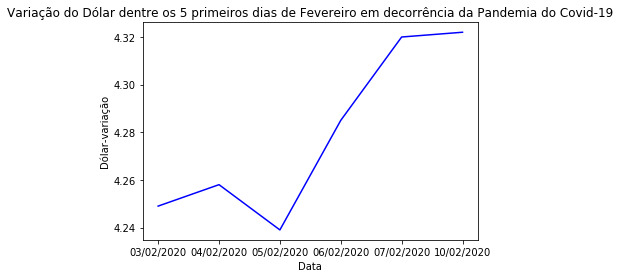

In [54]:
x =  Seis_dias_de_Fevereiro['Data:']
y =  Seis_dias_de_Fevereiro['Preço:']


plt.plot(x,y, "blue")

plt.title("Variação do Dólar dentre os 5 primeiros dias de Fevereiro em decorrência da Pandemia do Covid-19")

plt.xlabel('Data')

plt.ylabel('Dólar-variação')

plt.show()

# ***Noticias que influenciaram o Dólar no mês de Fevereiro:***

1. Em fevereiro, o Dólar acumulou uma valorização de 4,56%, a maior para o mês desde 2015(6,19%)

2. Esse mês foi dividido por duas etapas, do dia 1 ao 21, onde todos estavam com cautela em relação ao coronavírus, porém sem grandes preocupações, pois a doença parecia ter se estabilizado com menos casos surgindo na China e menor número de ocorrências em outros países.

3. Porém como precaução, os investidores iniciaram uma corrida ao dólar, para proteger suas carteiras caso a doença começasse a se espalhar pelo mundo, pois se isso ocorre-se a moeda americana iria se valorizar e assim serviria para amenizar uma possível queda da bolsa.

3. A partir do dia 23 esse cenário teve uma mudança, e o que os investidores mais temiam aconteceu, quase que do dia para a noite, houve um aumento súbito nos casos do coronavírus na Itália, Irã e na Coreia do Sul, criando novos epicentros da doença além das fronteiras da China, gerando uma forte mudança nos mercados

4. No Brasil, devido ao carnaval, os mercados estiveram fechados no dia 23 e 24. Assim quando foram abertos no dia 25 (quarta-feira),fazendo com que tivéssemos uma sessão caótica, para ajustar os ativos ás oscilações internacionais. Apenas neste dia o Ibovespa desabou 7%, e foi o pior desempenho desde maio de 2017.

# ***Março***

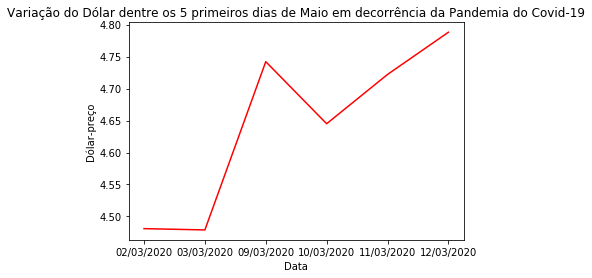

In [55]:
x = Seis_dias_de_Março['Data:'] # Aqui colocamos os valores desejáveis dentro de identificadores
y = Seis_dias_de_Março['Preço:'] # Aqui colocamos os valores desejáveis dentro de identificadores

plt.plot(x,y, "red") # Aqui definimos os parâmetros para nosso gráfico, os parâmetros serão (Data, Preço)

plt.title("Variação do Dólar dentre os 5 primeiros dias de Maio em decorrência da Pandemia do Covid-19")

plt.xlabel('Data')

plt.ylabel("Dólar-preço")

plt.show()

# ***Noticias que influenciaram o Dólar no mês de Março:***

1. Em março o dólar subiu 16%, e acumulou 30% no ano, devido ao impacto do fechamento de cadeias mundiais de abastecimento, preocupando os investidores.

2. O ambiente nos mercados globais é de aversão ao riso, mesmo depois da recuperação da atividade econômica chinesa, as principais economias do ocidente continuam em “lockdown” por tempo indeterminado. E por isso a demanda do Dólar continua firme, pois não se sabe quanto tempo o isolamento irá continuar nesses países.



# ***Abril***

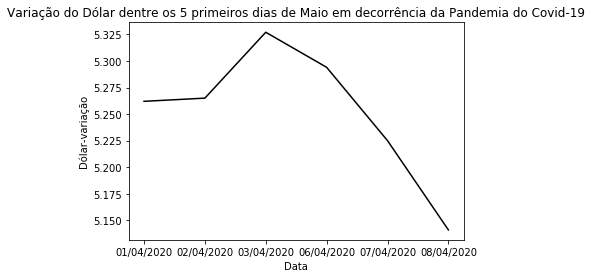

In [56]:
x = Seis_dias_de_Abril['Data:'] 
y = Seis_dias_de_Abril['Preço:']

plt.plot(x,y, "black")

plt.title("Variação do Dólar dentre os 5 primeiros dias de Maio em decorrência da Pandemia do Covid-19")

plt.xlabel('Data')

plt.ylabel('Dólar-variação')

plt.show()

# ***Noticias que influenciaram o Dólar no mês de Abril:***

1. No mês de abril o dólar fechou com alta de 4,69%., acumulando um total de 35,66% no ano.

2. Os investidores continuam preocupados com o efeito do coronavírus na economia, com a possibilidade mais clara de uma recessão global. Aumentando novamente a valorização da moeda norte-americana em relação ao real.

# ***Maio***

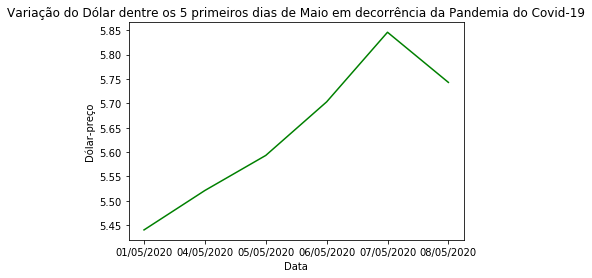

In [57]:
y = Seis_dias_de_Maio['Preço:']
x = Seis_dias_de_Maio['Data:']

plt.plot(x,y, "green")

plt.title("Variação do Dólar dentre os 5 primeiros dias de Maio em decorrência da Pandemia do Covid-19")

plt.ylabel("Dólar-preço")

plt.xlabel("Data")

plt.show()

# ***Noticias que influenciaram o Dólar no mês de Maio:***

1. O mês de abril terminou sua última semana com queda de 0,85%, cotado a R$5,34 na venda, assim fechando o mês com recuo de 1,79%, porém no ano, o dólar acumula 33,08%.

2. Os mercados internacionais reagiram mal ao aumento das tensões comerciais entre Estados Unidos e China, preocupando os investidores sobre o ritmo da recuperação econômica diante da crise causada pelo coronavírus.

3. “O real foi a moeda de pior desempenho no universo emergente, provavelmente pressionada pela preocupação mais ampla dos investidores sobre a capacidade da moeda de dar sequência ao recente desempenho superior em meio à deterioração da história local", disseram estrategistas do Morgan Stanley.”


# ***Junho***

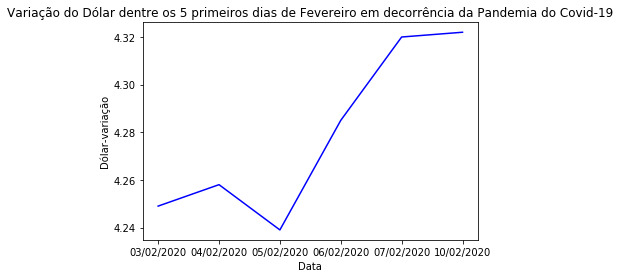

In [58]:

x =  Seis_dias_de_Fevereiro['Data:']
y =  Seis_dias_de_Fevereiro['Preço:']


plt.plot(x,y, "blue")

plt.title("Variação do Dólar dentre os 5 primeiros dias de Fevereiro em decorrência da Pandemia do Covid-19")

plt.xlabel('Data')

plt.ylabel('Dólar-variação')

plt.show()


# ***Noticias que influenciaram o Dólar no mês de Junho:***

1. O mês de junho iniciou com uma queda no valor do dólar, ficando abaixo do R$5,00 pela primeira vez depois do dia 16 de março. Com essa quedavolvendo os ganhos da véspera meio ao otimismo global em relação a uma recuperação econômica, ainda que as tensões políticas em Brasília e nos Estados Unidos continue no radar.

2. No exterior a uma grande preocupação ainda devido aos protestos generalizados contra o racismo no Estados Unidos, e com a tensão entre Pequim e Washington.

## Escala do Dólar nos meses de Janeiro a Junho: 


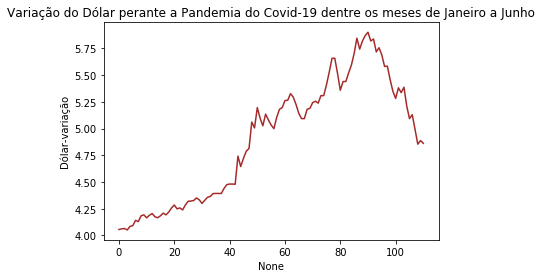

In [59]:
y = df["Preço:"]

plt.plot(y, "brown")
plt.title("Variação do Dólar perante a Pandemia do Covid-19 dentre os meses de Janeiro a Junho")

plt.xlabel("None")

plt.ylabel("Dólar-variação")

plt.show()

# ***Conclusão***

Em meado de abril, as projeções ainda discutiam a sustentação	do dólar cotado a 5 reais, foi apenas na segunda, 4 de maio, que o boletim Focus do	Banco Central, que reúne a 	projeções das principais instituições financeiras, abandonou a casa dos	4 reais para o fim de 2020. Na semana passada, analistas e economistas apontavam a impossibilidade matemática de a cotação chegar a 6 reais.    

Na quinta - feira, 7 de maio, o dólar fechou a 5,8360 reais, alta de 2,3%. Está a 0,164 reais de chegar ao patamar simbólico de 6,00 reais e a 2,02 reais de bater o recorde de maior alta real(que leva em conta a inflação). Há apenas dois meses, em 5 de março, os 5 reais pareciam distantes quando o ministro Guedes disse que o dólar iria a este patamar caso "muita besteira" fosse feita. Àquela época, o dólar estava a 4,65 reais.

"Pode chegar a 5 reais? Ué,se o presidente pedir para sair, se todo mundo pedir para sair. É um câmbio que flutua, se fizer muita besteira, ele pode ir para esse nível", disse Guedes na ocasião.	
Agora, os 6 reais são uma possibilidade cada vez mais real.		
O avanço rumo ao novo patamar veio após o Banco Central cortar a taxa básica de juros de 3,75% para 3% ao ano na quarta-feira, 6 de maio), uma redução maior do que a esperada pelo mercado.	


Desde então, a saída de Sergio Moro, ex-ministro da Justiça, do	governo de Jair	Bolsonaro, e suas implicações políticas agravam a turbulência em Brasília, que vive uma crise entre o 	Executivo e demais poderes, com a pandemia de coronavírus e	a crise econômica em decorrência dos esforços para contê-la como pano de fundo.		
Estrangeiros têm retirado os investimentos do país desde 2019, o que contribui para o dólar em alta. Na Bolsa são 44 bilhões reais a menos de aportes estrangeiros desde janeiro do ano passado, segundo dados da B3.	


Outro ponto que contribui para	a alta do dólar é a deterioração fiscal do Brasil, com os gastos do governo para atenuar os efeitos econômicos da pandemia de Covid-19.	
Assim, a mudança na perspectiva e receio quanto a eventuais reduções	na nota	do Brasil 	também contribuem para a perda de valor do real, apontam especialistas.	
